In [1]:
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))

In [2]:
pr_file_path <- file.path("../../../results/2.modeling/precision_recall_scores.csv.gz")
pr_df <- read.csv(pr_file_path)

# update one of the shuffled_model columns to Shuffled and Not Shuffled
pr_df$shuffled <- ifelse(pr_df$shuffled == "False", "Not Shuffled",
                  ifelse(pr_df$shuffled == "True", "Shuffled", pr_df$shuffled))

head(pr_df)


,dataset_type,shuffled,injury_type,precision,recall
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Test,Not Shuffled,Control,0.6227323,1
2,Test,Not Shuffled,Control,0.6229630,1
3,Test,Not Shuffled,Control,0.6231938,1
4,Test,Not Shuffled,Control,0.6234248,1
5,Test,Not Shuffled,Control,0.6236559,1
6,Test,Not Shuffled,Control,0.6238872,1


In [3]:
unique(pr_df$dataset_type)

[1] "Test"              "Train"             "Plate Holdout"    
[4] "Treatment Holdout" "Well Holdout"

In [4]:
# Define the desired order of dataset_type
dataset_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")
pr_df$dataset_type <- factor(pr_df$dataset_type, levels = dataset_order)

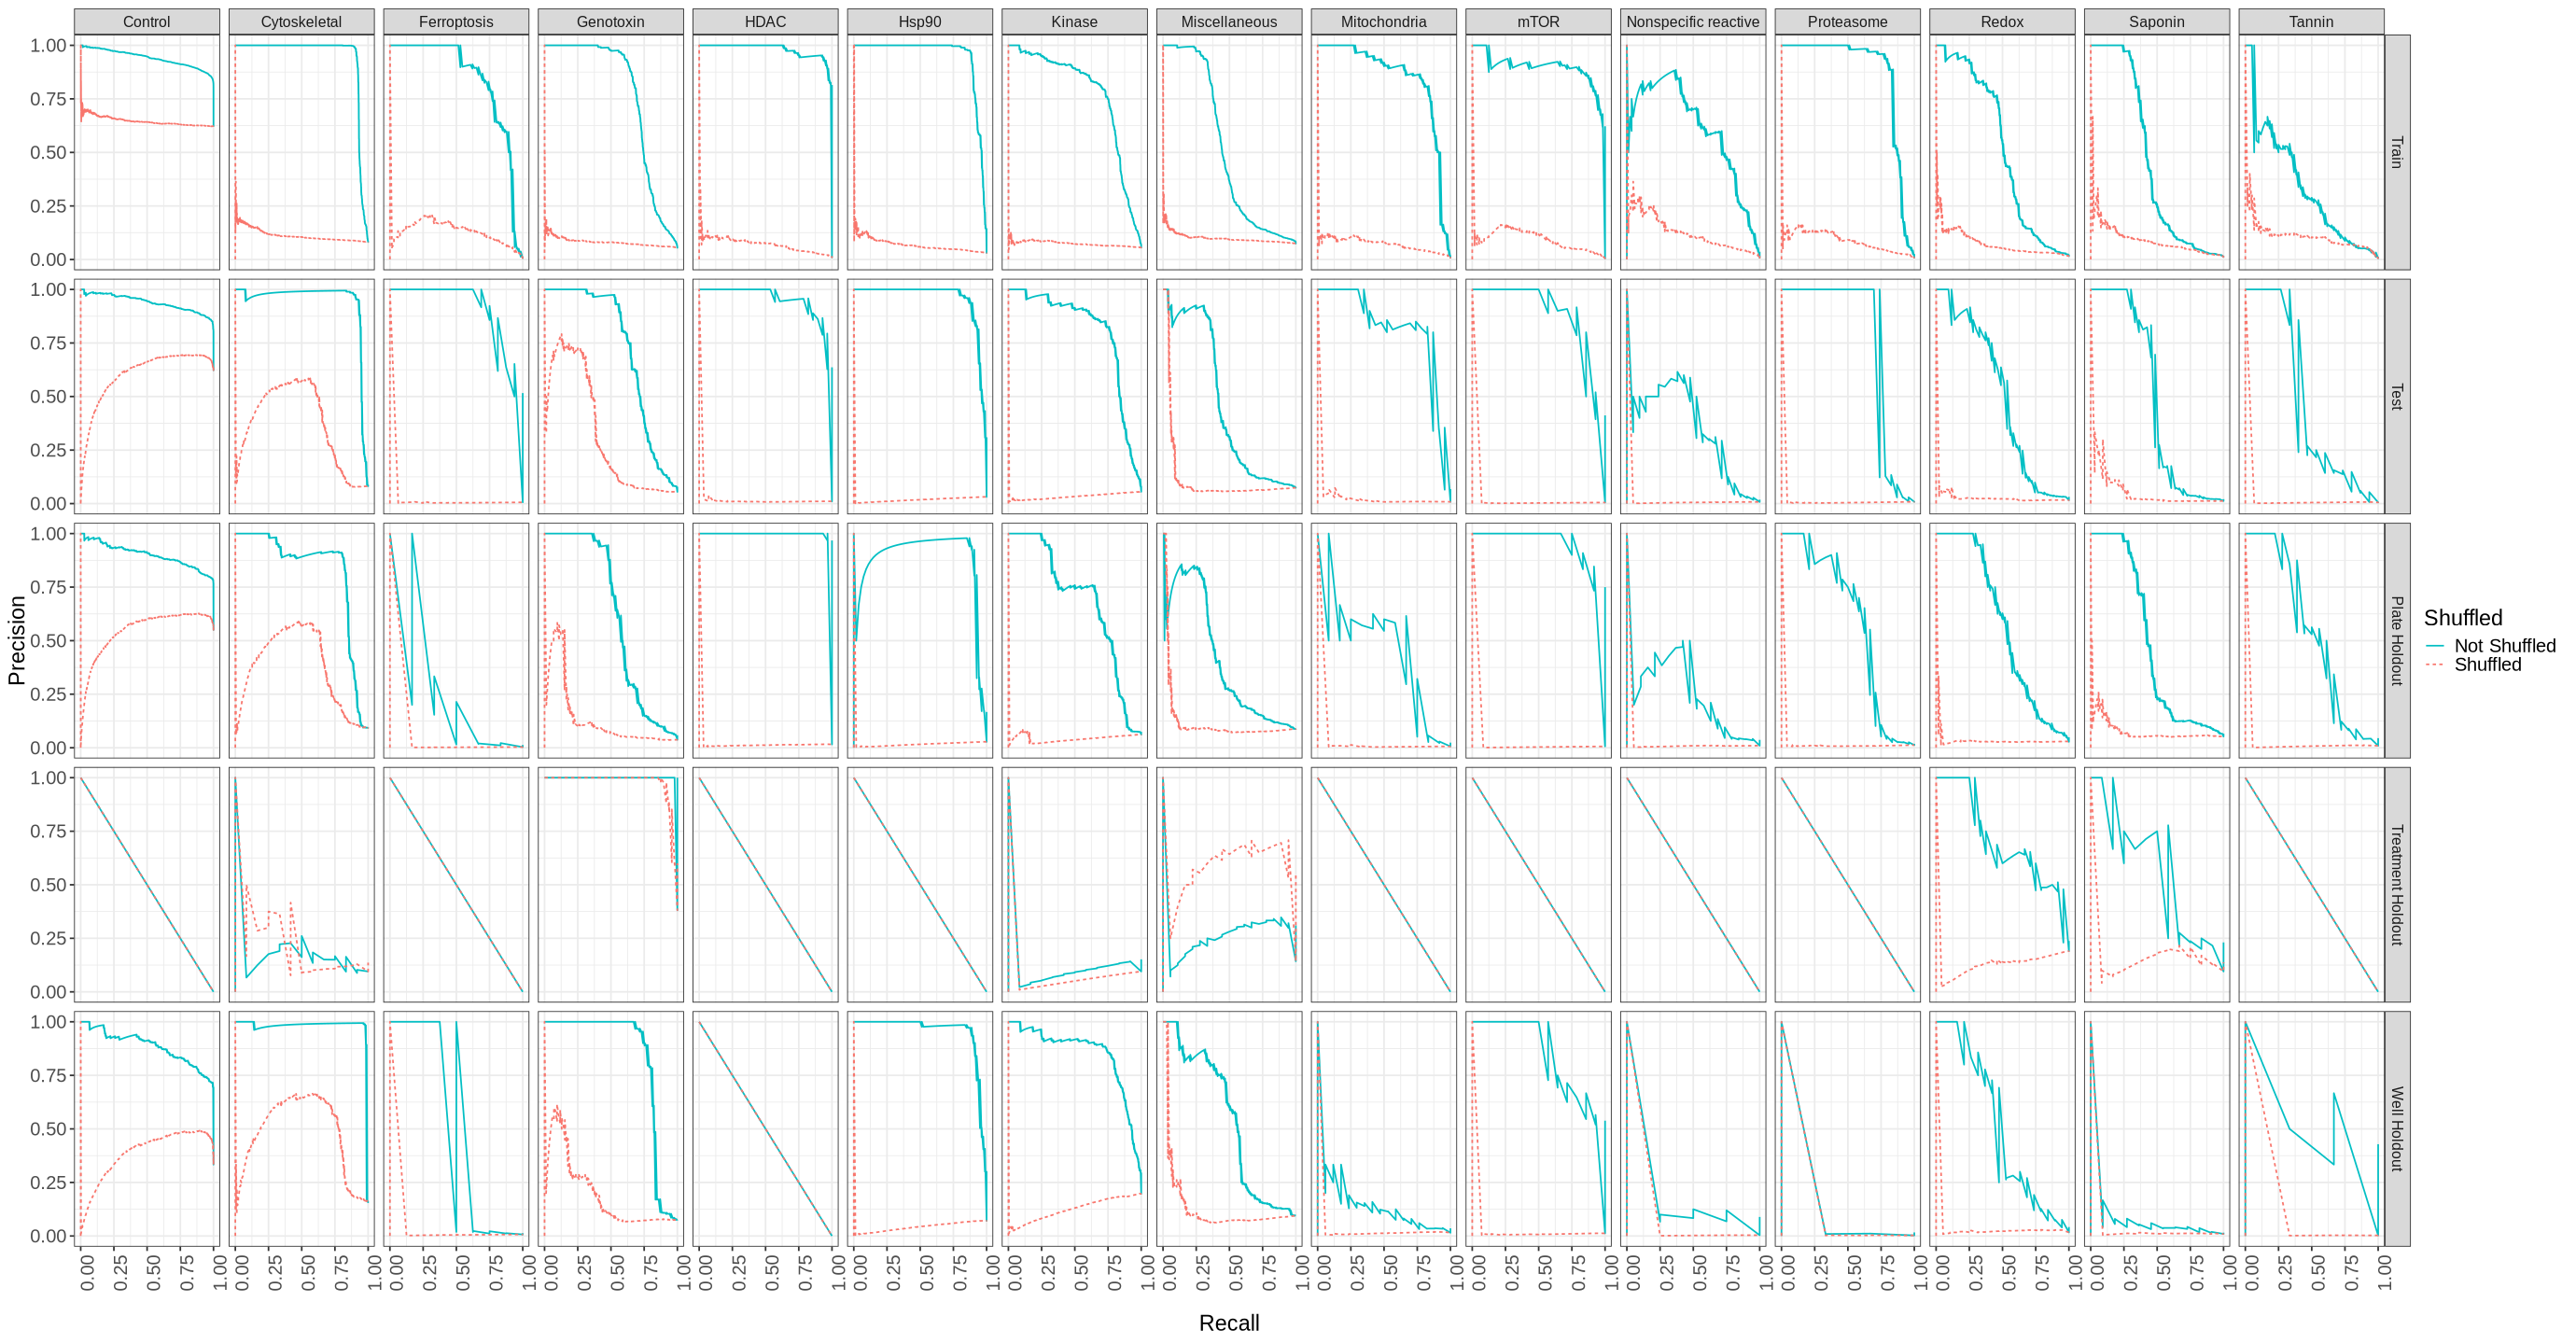

In [5]:
# Set plot dimensions
width <- 23
height <- 12
options(repr.plot.width = width, repr.plot.height = height)

# Create the plot
ggplot(pr_df, aes(x = recall, y = precision, color = shuffled)) +
  geom_line(aes(linetype = shuffled)) +
  facet_grid(dataset_type ~ injury_type) +
  theme_bw() +

  theme(
    legend.spacing.y = unit(0.1, "cm"),
    legend.box.spacing = unit(0.1, "cm"),
    legend.key.size = unit(0.7, "lines"),
    legend.key.width = unit(1, "lines"),
    strip.text = element_text(size = 9.5),
    axis.text.x = element_text(angle = 90, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    axis.title.x.bottom = element_text(margin = margin(t = 15)),
    axis.title.y.left = element_text(margin = margin(t = 15)),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
    ) + 
  
 scale_color_manual(values = c(
      "Shuffled" = "#f8766d",
      "Not Shuffled" = "#03bfc4"
    )) + 

labs(x = "Recall", y = "Precision", linetype = "Shuffled", color = "Shuffled") 


# Save the plot
ggsave("full_pr_curves.png", width = width, height = height, dpi = 600)


In [6]:
unique(pr_df$dataset_type)

[1] Test              Train             Plate Holdout     Treatment Holdout
[5] Well Holdout     
Levels: Train Test Plate Holdout Treatment Holdout Well Holdout

Next is to create a PR curve that merges both the train and test lines

In [7]:
# Filter the dataframe to select only "test", "train", and "plate_holdout" datasets
filtered_pr_df <- pr_df %>%
  filter(dataset_type %in% c("Test", "Train"))


# Create line_id column
filtered_pr_df <- filtered_pr_df %>%
  mutate(line_id = case_when(
    dataset_type == "Test" & shuffled == "Not Shuffled" ~ "Test + Not Shuffled",
    dataset_type == "Test" & shuffled == "Shuffled" ~ "Test + Shuffled",
    dataset_type == "Train" & shuffled == "Not Shuffled" ~ "Train + Not Shuffled",
    dataset_type == "Train" & shuffled == "Shuffled" ~ "Train + Shuffled",
  )) %>%
  mutate(is_train_test = if_else(dataset_type %in% c("test", "train"), "test_train", "plate_holdout"))

head(filtered_pr_df)

,dataset_type,shuffled,injury_type,precision,recall,line_id,is_train_test
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Test,Not Shuffled,Control,0.6227323,1,Test + Not Shuffled,plate_holdout
2,Test,Not Shuffled,Control,0.6229630,1,Test + Not Shuffled,plate_holdout
3,Test,Not Shuffled,Control,0.6231938,1,Test + Not Shuffled,plate_holdout
4,Test,Not Shuffled,Control,0.6234248,1,Test + Not Shuffled,plate_holdout
5,Test,Not Shuffled,Control,0.6236559,1,Test + Not Shuffled,plate_holdout
6,Test,Not Shuffled,Control,0.6238872,1,Test + Not Shuffled,plate_holdout


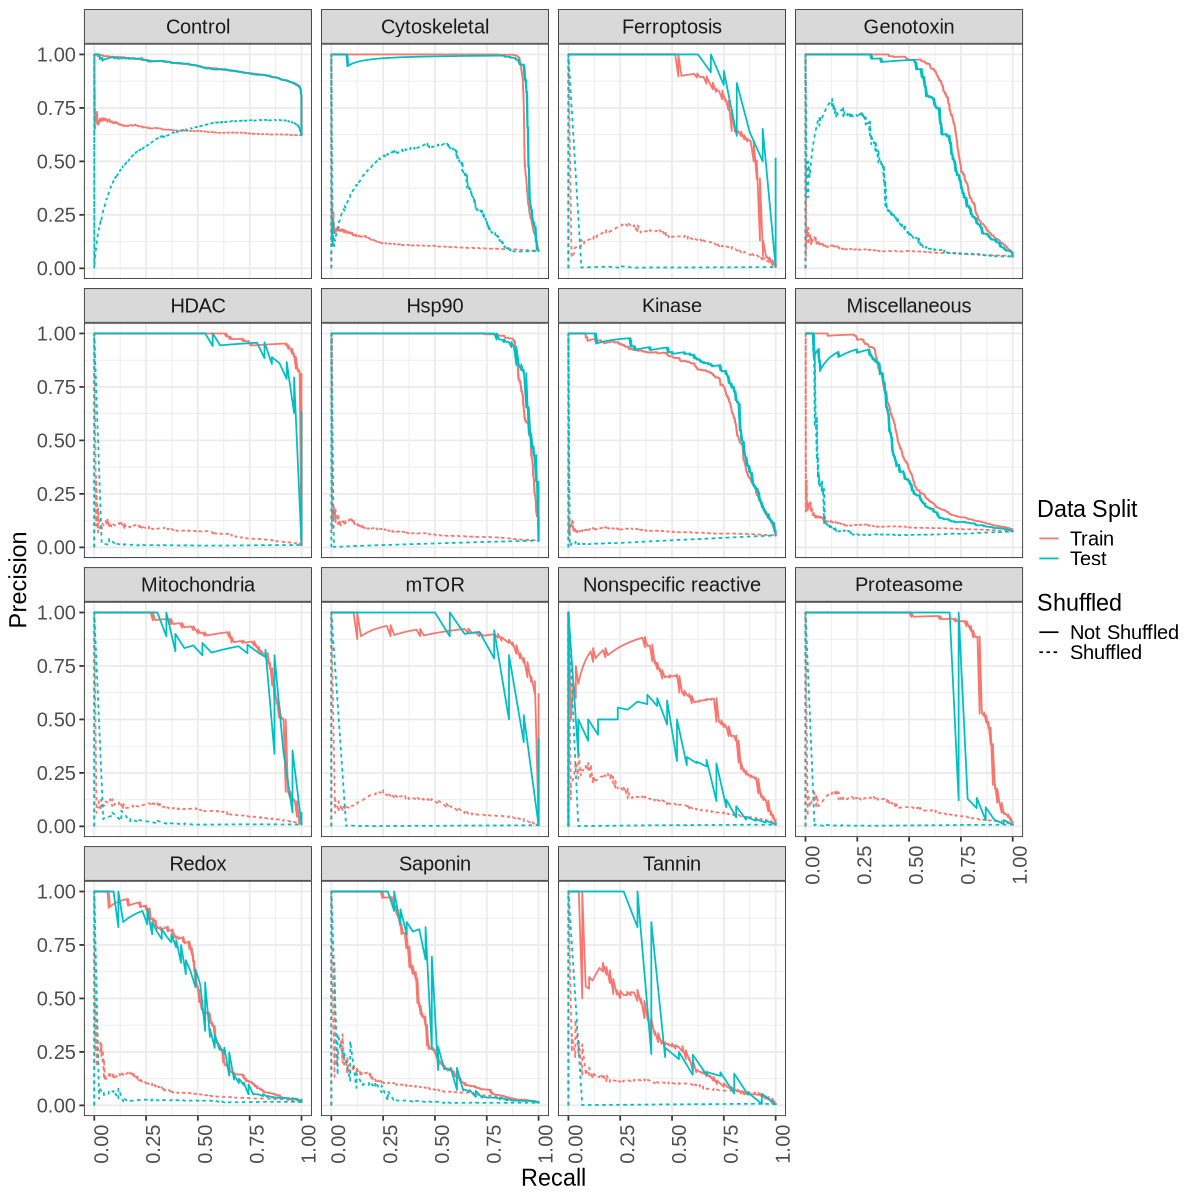

In [8]:
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)


ggplot(filtered_pr_df, aes(x = recall, y = precision)) +
    geom_line(aes(color = dataset_type, linetype = shuffled)) +
    facet_wrap(~injury_type) +
    xlab("Recall") +
    ylab("Precision") +
    theme_bw() +
    theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90, size = 12),
        strip.text = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)) +

    labs(color = "Data Split", linetype = "Shuffled")
    
    
    # scale_color_manual(values = c(
    #   "Shuffled" = "#f8766d",
    #   "Not Shuffled" = "#03bfc4"
    # ))

ggsave("only_test_train_pr_curve.png", width = width, height = height, dpi=600)